# Linear Regression using PyTorch

### Let's import all the necessary packages

In [70]:
import warnings
warnings.filterwarnings('ignore')
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

### In this experiment we will use synthetic data

Intialising the data randomly around the line $y = 2*x$

In [71]:
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 -2*random.random() for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

### Plotting the data

To get sense of the data. Let us plot the data

<IPython.core.display.Javascript object>


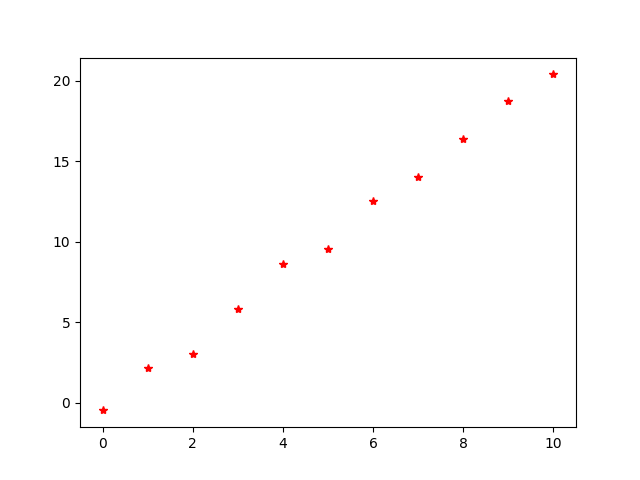

In [79]:
%matplotlib notebook
plt.plot(x_train, y_train, 'r*')

### Step 1: Create a Model that takes *'in_features = 1'* and *'out_features = 1'*

In [73]:
class Model(torch.nn.Module):
    def __init__(self):
        
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self, x):
        
        y_pred = self.linear(x)
        return y_pred
    
    

In [74]:
model = Model()

### Step 2: Construct loss and optimizer, selecting from the PyTorch API
We use the ***Mean Squarred Error Loss*** and the ***SGD optimizer***

In [75]:
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Step 3: Training Cycle -> *Forward, Backward, Update*

Let us run the training cycle for *200* epochs, where

***Epoch*** is one *forward pass* and one *backward pass* of all the training samples

In [76]:
epochs = 200
x_data = torch.from_numpy(x_train)
y_data = torch.from_numpy(y_train)

for epoch in range(epochs):
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()

0 1765.791748046875
1 83.32527923583984
2 6.152379035949707
3 2.6048836708068848
4 2.434250593185425
5 2.418591022491455
6 2.4101359844207764
7 2.4021072387695312
8 2.394190549850464
9 2.3863728046417236
10 2.3786509037017822
11 2.3710215091705322
12 2.3634896278381348
13 2.3560471534729004
14 2.3486990928649902
15 2.341439723968506
16 2.3342697620391846
17 2.3271872997283936
18 2.3201904296875
19 2.3132822513580322
20 2.306455612182617
21 2.2997162342071533
22 2.293058156967163
23 2.2864830493927
24 2.2799859046936035
25 2.273571491241455
26 2.2672336101531982
27 2.260974168777466
28 2.254793167114258
29 2.248685359954834
30 2.24265456199646
31 2.236697196960449
32 2.230814218521118
33 2.225001335144043
34 2.219261646270752
35 2.213590621948242
36 2.2079904079437256
37 2.2024590969085693
38 2.1969962120056152
39 2.1915981769561768
40 2.1862692832946777
41 2.181001663208008
42 2.175804615020752
43 2.170667886734009
44 2.1655921936035156
45 2.160583734512329
46 2.1556320190429688
47 2.1

### Testing

Let us test the trained model to predict *'y'*, for a given value of *'x'*

In [77]:
x_reg = torch.tensor([[4.]])
print(model.forward(x_reg).item())

8.039587020874023


As it can be seen, our prediction, though not exact, is almost equal to $4*2=8$

### Plot Line

Finally, let us plot the best fit line

<IPython.core.display.Javascript object>


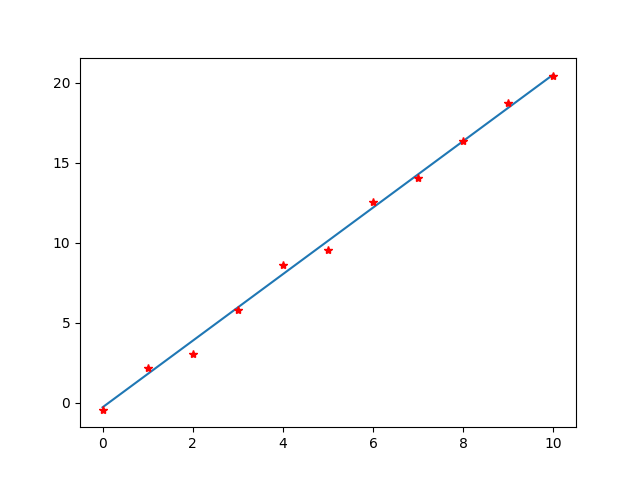

In [78]:
%matplotlib notebook
y_plot = []
for x_reg in x_data:
    y_plot.append(model.forward(x_reg).item())
  

plt.plot(x_train, y_plot)
plt.plot(x_train, y_train, 'r*')